In [ ]:
#import libraries
import keras
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.optimizers import Adam,RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import os
from PIL import Image
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd
import os.path

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
os.listdir('gdrive/My Drive/Colab Notebooks/Pre-Trained/vgg19/')

['testing2',
 'train',
 'models',
 'models2',
 'models3',
 'models4',
 'models5',
 'freeze']

In [ ]:
enc = OneHotEncoder()
enc.fit([[0], [1], [2]]) 
def names(number):
    if(number == 0):
        return 'Abnormal Leukemia'
    elif(number== 1):
        return 'Normal Leukemia'
    else:
        return 'Normal'

In [ ]:
data = []
paths = []
ans = []
for r, d, f in os.walk('gdrive/My Drive/Colab Notebooks/cnn/train-skenario2/abnormal100'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((224, 224,))
    x = np.array(x)
    if(x.shape == (224,224,3)):
        data.append(np.array(x))
        ans.append(enc.transform([[0]]).toarray())

len(ans)

100

In [ ]:
paths = []
for r, d, f in os.walk('gdrive/My Drive/Colab Notebooks/cnn/train-skenario2/normal_leukemia100'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((224,224))
    x = np.array(x)
    if(x.shape == (224,224,3)):
        data.append(np.array(x))
        ans.append(enc.transform([[1]]).toarray())
        
len(ans)

200

In [ ]:
paths = []
for r, d, f in os.walk('gdrive/My Drive/Colab Notebooks/cnn/train-skenario2/normal_noncancer100'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((224,224))
    x = np.array(x)
    if(x.shape == (224,224,3)):
        data.append(np.array(x))
        ans.append(enc.transform([[2]]).toarray())
        
len(ans)

300

In [ ]:
data = np.array(data)
data.shape

(300, 224, 224, 3)

In [ ]:
ans = np.array(ans)
ans = ans.reshape(len(ans),3)

In [ ]:
enc2 = OneHotEncoder()
enc2.fit([[0], [1], [2]]) 
def names(number):
    if(number == 0):
        return 'Abnormal Leukemia'
    elif(number== 1):
        return 'Normal Leukemia'
    else:
        return 'Normal'

In [ ]:
data2 = []
paths2 = []
ans2 = []
for s, n, z in os.walk('gdrive/My Drive/Colab Notebooks/Pre-Trained/vgg19/testing2/abnormal'):
    for file in z:
        if '.jpg' in file:
            paths2.append(os.path.join(s, file))

for path in paths2:
    img = Image.open(path)
    x = img.resize((224,224))
    x = np.array(x)
    if(x.shape == (224,224, 3)):
        data2.append(np.array(x))
        ans2.append(enc2.transform([[0]]).toarray())

len(ans2)

3

In [ ]:
paths2 = []
for s, n, z in os.walk('gdrive/My Drive/Colab Notebooks/Pre-Trained/vgg19/testing2/normal_leukemia'):
    for file in z:
        if '.jpg' in file:
            paths2.append(os.path.join(s, file))

for path in paths2:
    img = Image.open(path)
    x = img.resize((224,224))
    x = np.array(x)
    if(x.shape == (224,224,3)):
        data2.append(np.array(x))
        ans2.append(enc2.transform([[1]]).toarray())

len(ans2)

6

In [ ]:
paths2 = []
for s, n, z in os.walk('gdrive/My Drive/Colab Notebooks/Pre-Trained/vgg19/testing2/normal_noncancer'):
    for file in z:
        if '.jpg' in file:
            paths2.append(os.path.join(s, file))

for path in paths2:
    img = Image.open(path)
    x = img.resize((224,224))
    x = np.array(x)
    if(x.shape == (224,224,3)):
        data2.append(np.array(x))
        ans2.append(enc2.transform([[2]]).toarray())

len(ans2)

9

In [ ]:
data2 = np.array(data2)
data2.shape

(9, 224, 224, 3)

In [ ]:
ans2 = np.array(ans2)
ans2 = ans2.reshape(len(ans2),3)

In [ ]:
# x_train,x_val,y_train,y_val = train_test_split(data, ans, test_size=0.2, shuffle=True, random_state=2)
best_score = 0.0
best_fold_index=0
i=0
# input_shape= ( 224, 224, 3 )
fold_history = []
index = 0

In [ ]:
from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor

from keras.layers import Dense, GlobalAveragePooling2D

# Get the InceptionV3 model so we can do transfer learning
base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

In [ ]:
# Add a fully-connected layer and a logistic layer with 3 classes
# x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

In [ ]:
# The model we will train
model = Model(inputs = base_model.input, outputs = predictions)

In [ ]:
# first: train only the top layers i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers[:8]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [ ]:
#compile the model
opt = Adam(lr=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

Y_non_one_hot = np.array([np.where(r == 1)[0][0] for r in ans])
for index, (train_indices, val_indices) in enumerate(skf.split(data, Y_non_one_hot)):
    # print("Ini fold ke {}".format(index + 1))
    # print(train_indices)
    X_train_cv = data[train_indices]
    X_val_cv = data[val_indices]
    Y_train_cv = ans[train_indices]
    Y_val_cv = ans[val_indices]
    
    data_split = {'X_train': X_train_cv, 'X_val': X_val_cv, 'Y_train': Y_train_cv,
                  'Y_val': Y_val_cv, 'train_index': train_indices, 'val_index': val_indices}
    model_path = "gdrive/My Drive/Colab Notebooks/Pre-Trained/InceptionV3/freeze/model4/"
    
    if not os.path.exists(model_path):
      os.makedirs(model_path)
    filepath = model_path + \
          "fold_{}_".format(index + 1) + \
          "epochs-{epoch:03d}-val_acc-{val_acc:.3f}.hdf5"
    filepath2 = model_path + "best_weight_fold_{}.hdf5".format(index + 1)
    early_stopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1, restore_best_weights=True)

    epoch_awal = 0
    epoch_akhir =10
    early_stopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1, restore_best_weights=True)
    checkpoint = ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, verbose=1, save_best_only=True, mode='min')
    checkpoint2 = ModelCheckpoint(filepath2, monitor='loss', save_weights_only=True, verbose=1, save_best_only=True, mode='min')
    callbacks_list = [checkpoint, early_stopping, checkpoint2]

    history = model.fit(X_train_cv, Y_train_cv, batch_size=8, initial_epoch=epoch_awal,
                        epochs=epoch_akhir, verbose=1, validation_data=(X_val_cv, Y_val_cv), callbacks=callbacks_list)
                    
    fold_history.append(history)

Train on 240 samples, validate on 60 samples
Epoch 1/10
240/240 [==============================] - 8s 35ms/step - loss: 0.2956 - acc: 0.9125 - val_loss: 1462.3563 - val_acc: 0.3333

Epoch 00001: loss improved from inf to 0.29562, saving model to gdrive/My Drive/Colab Notebooks/Pre-Trained/InceptionV3/freeze/model4/fold_1_epochs-001-val_acc-0.333.hdf5

Epoch 00001: loss improved from inf to 0.29562, saving model to gdrive/My Drive/Colab Notebooks/Pre-Trained/InceptionV3/freeze/model4/best_weight_fold_1.hdf5
Epoch 2/10
240/240 [==============================] - 5s 23ms/step - loss: 0.0539 - acc: 0.9792 - val_loss: 666.3854 - val_acc: 0.3333

Epoch 00002: loss improved from 0.29562 to 0.05386, saving model to gdrive/My Drive/Colab Notebooks/Pre-Trained/InceptionV3/freeze/model4/fold_1_epochs-002-val_acc-0.333.hdf5

Epoch 00002: loss improved from 0.29562 to 0.05386, saving model to gdrive/My Drive/Colab Notebooks/Pre-Trained/InceptionV3/freeze/model4/best_weight_fold_1.hdf5
Epoch 3/10
240

In [ ]:
# model_path = "gdrive/My Drive/Colab Notebooks/cnn/tanpa-kfold/model1000/nyoba5/"
print("Best Fold", best_fold_index + 1)
best_weight = model_path + "best_weight_fold_{}.hdf5".format(best_fold_index + 1)
# best_weight = model_path + "best_weight_fold_1.hdf5"
print("best_weight", best_weight)

# model = cnn2()
model.load_weights(best_weight)
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics= ['acc'])
test_scores = model.evaluate(data2, ans2, verbose=1)
# print("CNN Loss: %.2f%%" % (100-scores[1]*100))
# print("CNN Accuracy: %.2f%%" % (scores[1]*100))
print("CNN loss: %.2f%%" % (100 - test_scores[1] * 100))
print("trained model directly, accuracy: {:5.2f}%".format(test_scores[1] * 100))

Best Fold 1
best_weight gdrive/My Drive/Colab Notebooks/Pre-Trained/InceptionV3/freeze/model4/best_weight_fold_1.hdf5
9/9 [==============================] - 1s 108ms/step
CNN loss: 66.67%
trained model directly, accuracy: 33.33%


In [ ]:
#print classification report
from sklearn import metrics
from imblearn.metrics import sensitivity_specificity_support

true_labels = ['Abnormal','Normal Leukemia','Normal Noncancer']
labels = [0,1,2]
Y_pred = model.predict(data2, batch_size=data2.shape[0])
preds = np.argmax(Y_pred, axis=1)
y_test_non_one_hot = np.argmax(ans2, axis=1)

# Save variable
acc = metrics.accuracy_score(y_test_non_one_hot, preds)
cm = metrics.confusion_matrix(y_test_non_one_hot, preds, labels)
f1 = metrics.f1_score(y_test_non_one_hot, preds, average='micro')
precision = metrics.precision_score(y_test_non_one_hot, preds, average='micro')
recall = metrics.recall_score(y_test_non_one_hot, preds, average='micro')
# sens_mac = sensitivity_specificity_support(ans2, Y_pred, average='macro')
# sens_mic = sensitivity_specificity_support(ans2, Y_pred, average='micro')
# sens_weight = sensitivity_specificity_support(ans2, Y_pred, average='weighted')
classification_report = metrics.classification_report(y_test_non_one_hot, preds,labels=labels,target_names=true_labels) 
print("Accuracy", acc)
print("Precision", precision)
print("Recall", recall)
print("F1-score", f1)
# print("Sensitivity Specificity Macro", sens_mac)
# print("Sensitivity Specificity Micro", sens_mic)
# print("Sensitivity Specificity Weighted", sens_weight)
print(classification_report)

print("Confusion Matrix")
print(cm)

Accuracy 0.3333333333333333
Precision 0.3333333333333333
Recall 0.3333333333333333
F1-score 0.3333333333333333
                  precision    recall  f1-score   support

        Abnormal       0.00      0.00      0.00         3
 Normal Leukemia       0.33      1.00      0.50         3
Normal Noncancer       0.00      0.00      0.00         3

        accuracy                           0.33         9
       macro avg       0.11      0.33      0.17         9
    weighted avg       0.11      0.33      0.17         9

Confusion Matrix
[[0 3 0]
 [0 3 0]
 [0 3 0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


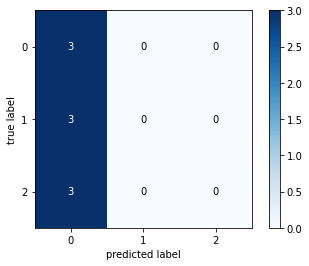

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np 
           
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False)
plt.show()
# plt.savefig('gdrive/My Drive/Colab Notebooks/cnn/model_data1000/cm-.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


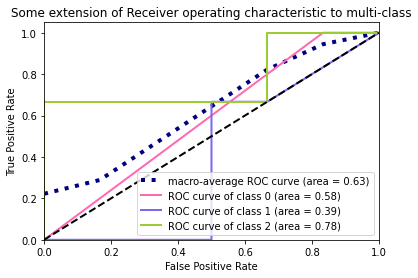

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ans2[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ans2.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['hotpink', 'mediumslateblue', 'yellowgreen', 'deepskyblue', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
plt.savefig('gdrive/My Drive/Colab Notebooks/cnn/model_data1000/roc-2.png')